# Visualizing Ligand Networks

When constructing a ligand network, it is very helpful to visualize it, both to quickly check that it makes sense and to allow rapid iteration of settings.

## Setup

In [1]:
%matplotlib inline

import rdkit.Chem

import openfe

This cookbook assumes you've already loaded a `LigandNetwork`. For more information, see [Generate a Ligand Network Automatically]:

[Generate a Ligand Network Automatically]: https://docs.openfree.energy/en/stable/cookbook/generate_ligand_network.html

In [2]:
ligand_network = openfe.ligand_network_planning.generate_minimal_spanning_network(
    ligands=[
        openfe.SmallMoleculeComponent(mol) 
        for mol in rdkit.Chem.SDMolSupplier(
            "assets/somebenzenes.sdf", 
            removeHs=False,
        )
    ],
    mappers=[openfe.setup.LomapAtomMapper()],
    scorer=openfe.lomap_scorers.default_lomap_score,
)

## Visualize Network Topology

The topology of the network describes how the ligands are transformed into each other. The network itself forms a graph that can be visualized with the `plot_atommapping_network` function:

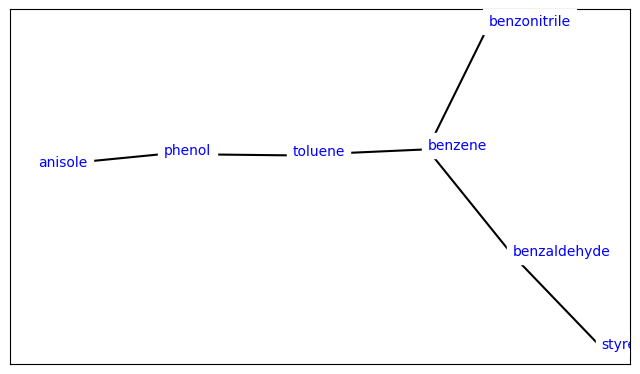

In [3]:
from openfe.utils.atommapping_network_plotting import plot_atommapping_network

plot_atommapping_network(ligand_network)

## Visualizing Edges

The edges of the network each represent a single transformation. They include not only the identities of the two molecules being mutated between, but also the complete mapping between atoms in those molecules. An edge can be visualized with the `view_mapping_3d` function: 

In [4]:
from openfe.utils.visualization_3D import view_mapping_3d

benzene_to_toluene = [
    edge for edge in ligand_network.edges 
    if {edge.componentA.name, edge.componentB.name} == {"benzene", "toluene"}
][0]

view_mapping_3d(benzene_to_toluene)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In the middle, both molecules are overlaid to demonstrate their 3D alignment. Each molecule is also depicted on its own on either side, with colored spheres indicating atoms that are mutated into each other. For instance, one of the benzene's hydrogen atoms is highlighted in the same color as the toluene's methyl carbon, indicating that this hydrogen mutates into the methyl carbon. Atoms without spheres vanish over the transformation, rather than being mutated into another atom.

The IPyWidgets `interact` function can be used to easily inspect each edge:

In [5]:
from openfe.utils.visualization_3D import view_mapping_3d
from ipywidgets import interact

interact(
    lambda **kwargs: view_mapping_3d(**kwargs),
    mapping=[
        (f"{edge.componentA.name} -> {edge.componentB.name}", edge)
        for edge in ligand_network.edges
    ],
    spheres=True, 
    show_atomIDs=True,
)

interactive(children=(Dropdown(description='mapping', options=(('phenol -> anisole', LigandAtomMapping(compone…

<function __main__.<lambda>(**kwargs)>

## Visualizing Nodes

Sometimes it is helpful to visualize all the ligands together, for instance to inspect their alignment. This can be done with the `view_components_3d` function.

In [6]:
from openfe.utils.visualization_3D import view_components_3d

view_components_3d(ligand_network.nodes)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol